In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('2015_sort.csv')
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,04-12-15,MJ1311YNG6KXVA,Hitachi HDS5C3030ALA630,3.000000e+12,0,100.0,0.0,134.0,112.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-01-15,9XW03B5R,ST31500541AS,1.500000e+12,1,118.0,189882022.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-04-15,JK1160YAHP0HTT,Hitachi HDS722020ALA330,2.000000e+12,1,100.0,0.0,100.0,0.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-10-15,PL1331LAGR6BMH,HGST HMS5C4040ALE640,4.000000e+12,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13-04-15,WD-WMC1T0751577,WDC WD30EFRX,3.000000e+12,1,200.0,55.0,NaN,NaN,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_norm = df[['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized',
           'smart_7_normalized','smart_12_normalized', 'smart_194_normalized', 
           'smart_197_normalized', 'smart_198_normalized', 'smart_199_normalized']]
df_norm.sample(n=5)

,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_12_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized
1371,117.0,94.0,100.0,100.0,75.0,100.0,26.0,100.0,100.0,200.0
467,117.0,95.0,100.0,100.0,76.0,100.0,33.0,100.0,100.0,200.0
759,100.0,134.0,100.0,100.0,100.0,100.0,240.0,100.0,100.0,200.0
2030,119.0,92.0,100.0,100.0,88.0,100.0,22.0,100.0,100.0,200.0
1884,100.0,120.0,100.0,100.0,100.0,100.0,181.0,100.0,100.0,200.0


In [75]:
X = df_norm.dropna(0,thresh =10).dropna(1)
y = df['failure'].values
y = np.delete(y,1)

In [82]:
import xgboost as xgb
import sklearn
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [91]:
eval_set = [(x_test,y_test)]
clf = XGBClassifier(objective ='reg:linear', 
                             max_depth = 10,
                             silent = 1,
                             learning_rate = 0.05,
                             n_estimators = 1000)

clf.fit(x_train, y_train, early_stopping_rounds=10,eval_metric= 'logloss', eval_set=eval_set)

y_pred = clf.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-logloss:0.692451
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.692176
[2]	validation_0-logloss:0.692713
[3]	validation_0-logloss:0.69264
[4]	validation_0-logloss:0.693368
[5]	validation_0-logloss:0.693908
[6]	validation_0-logloss:0.694573
[7]	validation_0-logloss:0.695488
[8]	validation_0-logloss:0.696501
[9]	validation_0-logloss:0.697062
[10]	validation_0-logloss:0.697574
[11]	validation_0-logloss:0.698526
Stopping. Best iteration:
[1]	validation_0-logloss:0.692176

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.28      0.36       294
           1       0.49      0.73      0.58       278

   micro avg       0.50      0.50      0.50       572
   macro avg       0.50      0.50      0.47       572
weighted avg       0.50      0.50      0.47       572

Confusion Matrix: 
 [[ 82 212]
 [ 76 202]]

Accuracy 0.4965034965034965


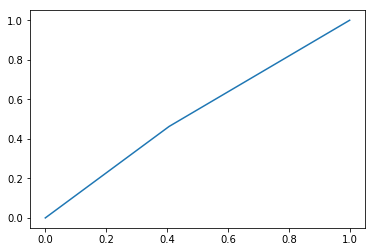

In [78]:
from sklearn import metrics
import matplotlib.pyplot as plt
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
plt.plot(tpr,fpr)
plt.show() 